In [4]:
#-------------------------
# Libs
#-------------------------
 
# External libs
# %matplotlib          Fuck this line right here.
import pymysql.cursors
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [5]:
#-------------------------
# SQL environments
#-------------------------
 
HOST = "localhost"
USER = "root" 
PASSWORD = "Is79t5Is79t5"
DB = "ercot_data"

#-------------------------
# Functions
#-------------------------
"""
Make a connection to MySQL
Execute the MySQL query and return the resutls
"""

def execute_dict_query(query):
    connection = pymysql.connect(host=HOST, 
                                 user=USER, 
                                 password=PASSWORD, 
                                 db=DB, 
                                 port=3306,
                                 cursorclass=pymysql.cursors.DictCursor)
    
    try:
        with connection.cursor() as cursor:
            # Create a new record
            cursor.execute(query)
            result = cursor.fetchall()
            return result
    finally:
        connection.close()

 


In [6]:
# Query data sorted by date and hour. SLOW!
result_dict = execute_dict_query('select * from DAM_LMP0  \
                                where delivery_date < "2012-12-31" \
                                and delivery_date > "2011-01-01" \
                                order by delivery_date, hour_ending')

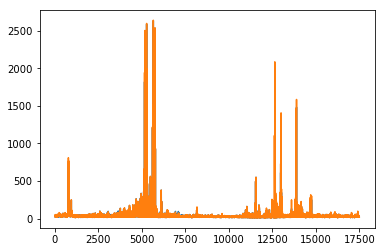

In [7]:
#Extract some data
prices1 = [i['n0001VICTOR'] for i in result_dict]
prices2 = [i['n0001'] for i in result_dict]
hours = [i['hour_ending'].total_seconds() for i in result_dict]
dates = [i['delivery_date'] for i in result_dict]
plt.plot(prices1)
plt.plot(prices2)
plt.show()

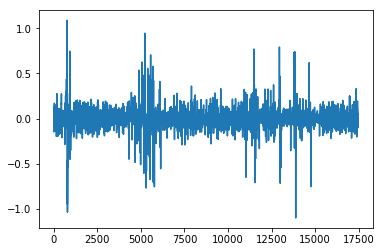

11.98669494391441608776131694


In [8]:
# Percent Change
k = 24
p_t = np.array(prices1[k:])
p_tk = np.array(prices1[:-k])
v = np.log10(p_t) - np.log10(p_tk)
plt.plot(v)
plt.show()

MAPE = np.mean(np.square(p_t-p_tk)/p_t)
print(MAPE)

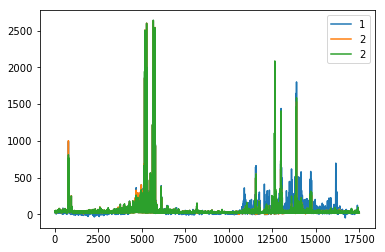

In [9]:
# Basic data plot
price1 = [float(i['AMNCOWD_8']) for i in result_dict]
price2 = [float(i['AZLES_K']) for i in result_dict]
price3 = [float(i['n0001']) for i in result_dict]

plt.plot(price1, label='1')
plt.plot(price2, label='2')
plt.plot(price3, label='2')
plt.legend()
plt.show()


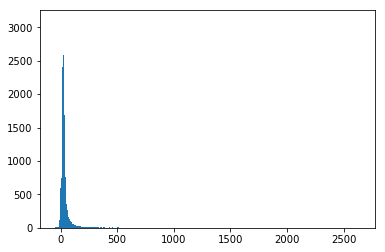

In [10]:
# Histogram
plt.hist(price1, 500)
plt.show()

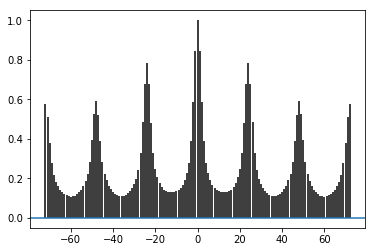

In [11]:
# Autocorrelation
plt.acorr(price1, maxlags=72)
plt.show()

In [12]:
np.mean(price1)

43.287123585229224

[ 28.52689124  26.88588505  26.08917088 ...,  27.35143936  29.09992171
  25.80891015]


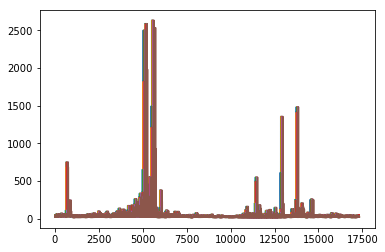

In [28]:
#extend this to get prices at different lags e.g. k-1, k-2, k-3
max_lag = 168
p_t = prices1[max_lag:]
X = []
for k in np.arange(0, max_lag, 24):
    t_k = np.array(prices1[(max_lag-k):-k], dtype='float')
    X.append(t_k)
X = np.swapaxes(np.array(X[1:]), 0, 1)
Y = [float(i) for i in p_t]
# use sklearn.LinearRegression to fit (X, Y)

regr = linear_model.LinearRegression()
regr.fit(X,Y)

print regr.predict(X)
plt.plot(X)
plt.show()


In [30]:
# Mean Model

def mean_model(X):
    return np.mean(X)

print mean_model(prices1)

36.44947582028123928203955642


In [34]:
# Random Walk Model

def random_walk(X):
    return X[-1]

print random_walk(prices1)

22.35


In [ ]:
# Moving Average Model



trainingX = X[:-2]
testX = X[-2:]

trainingY = Y[:-2]
testY = Y[-2:]

regr = linear_model.LinearRegression()
regr.fit(trainingX, trainingY)

print "Coefficients: \n", regr.coef_
print "Mean Squared Error", np.mean((regr.predict(testX) - testY) ** 2)
print "Variance score: ", regr.score(testX, testY)

plt.plot(testX, regr.predict(testX), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()